In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # библиотека seaborn

In [2]:
data_df=pd.read_excel('Data/Folds5x2_pp.xlsx')
data_df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [30]:
data_df.shape # Команда shape показывает число строк и столбцов в наборе данных

(9568, 5)

In [31]:
data_df.columns # выводит название всех колонок. Полезно, когда колонок слишком много и они не помещаются без прокрутки

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [32]:
data_df.info() # Команда info показывает количество пропусков и тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [33]:
data_df.isnull().sum() # Команда isnull проверяет пропуски в данных

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [36]:
data_df.isna().sum()/data_df.shape[0] # доля пропусков

AT    0.0
V     0.0
AP    0.0
RH    0.0
PE    0.0
dtype: float64

In [34]:
data_df.describe() # Команда describe показывает основные статистики

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


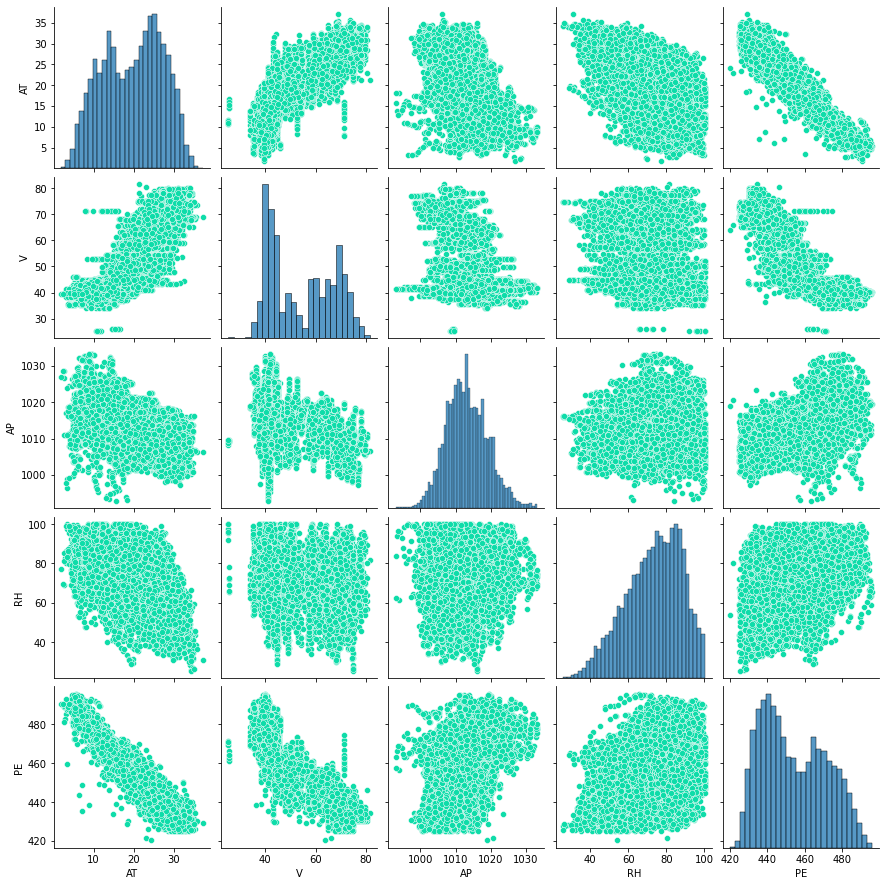

In [54]:
sns.pairplot(data_df[['AT', 'V', 'AP', 'RH', 'PE']], plot_kws={'color':'#0EDCA9'})

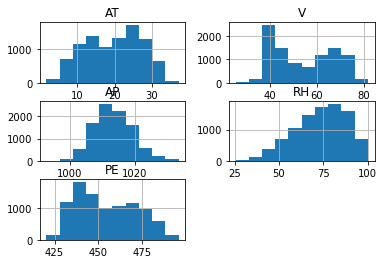

In [3]:
viz=data_df[['AT','V','AP','RH','PE']] # Гистограммы показывают: нормально ли распределены данные?
viz.hist()
plt.show()

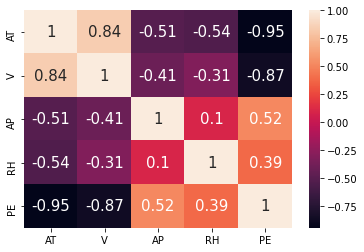

In [53]:
sns.heatmap(data_df.corr(method ='pearson'),annot=True,annot_kws={'size': 15}); # Добавили значения, можно менять их размер

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PE'>

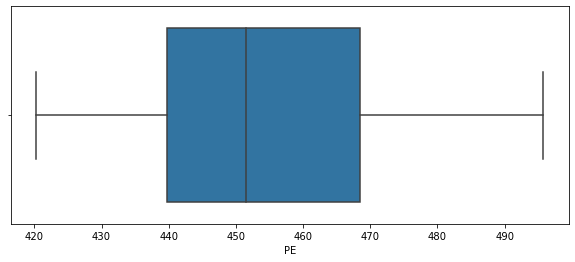

In [49]:
plt.figure(figsize=(10,4)) 
sns.boxplot(data_df['PE']) #Ящичковая диаграмма

In [ ]:
sns.pairplot(df[['alcohol','suicides']]) # распределение переменных и диаграммы рассеивания по конкретным заданным переменным

In [4]:
dataset=pd.read_excel('Data/Folds5x2_pp.xlsx') # данные импортируются в новый объект (переменную) dataset

In [5]:
len(dataset) # Число строк в наборе данных

9568

In [6]:
len(data_df) # Число строк в наборе данных

9568

In [7]:
x=data_df.drop(['PE'],axis=1).values # Создание перемнной х и помещение в нее всего dataset, кроме колонки PE
y=data_df['PE'].values # Создание перемнной н и помещение в нее колонки PE

In [8]:
print(x) # вывод значений побъекта (переменной) х

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]


In [9]:
print(y)  # вывод значений побъекта (переменной) у

[463.26 444.37 488.56 ... 429.57 435.74 453.28]


## Модель 1

In [10]:
from sklearn import linear_model

In [11]:
reg = linear_model.LinearRegression()
reg.fit(data_df[['AT','V','AP','RH']],data_df['PE'])

LinearRegression()

In [12]:
reg.predict([[14.96,41.76,1024.07,73.17]]) # прогноз по одному набору значений предикторов

array([467.26978996])

In [13]:
reg.coef_ #коэффициенты регрессии

array([-1.97751311, -0.23391642,  0.06208294, -0.1580541 ])

In [14]:
reg.intercept_ # свободный член

454.60927431531076

#### Другая запись той же модели

In [15]:
reg_1 = linear_model.LinearRegression()
reg_1.fit(data_df.drop('PE',axis='columns'),data_df.PE) # переменные можно указать таким образом. Это будет одно и то же

LinearRegression()

In [16]:
reg_1.predict([[14.96,41.76,1024.07,73.17]])

array([467.26978996])

In [17]:
reg_1.coef_ 

array([-1.97751311, -0.23391642,  0.06208294, -0.1580541 ])

In [18]:
reg_1.intercept_

454.60927431531076

#### Тертья запись той же модели

In [38]:
reg_2 = linear_model.LinearRegression()
reg_2.fit(x,y) # переменные можно указать таким образом. Это будет одно и то же

LinearRegression()

In [39]:
reg_2.predict([[14.96,41.76,1024.07,73.17]])

array([467.26978996])

In [40]:
reg_2.coef_ 

array([-1.97751311, -0.23391642,  0.06208294, -0.1580541 ])

In [41]:
reg_2.intercept_

454.60927431531076

## Модель 2

In [19]:
import statsmodels.formula.api as smf # Реализация множественной регрессии с помощью библиотеки statsmodels

In [20]:
model = smf.ols('PE ~ AT * V * AP * RH', data=data_df)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     9568.
Date:                Mon, 25 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:38:01   Log-Likelihood:                -27450.
No. Observations:                9568   AIC:                         5.493e+04
Df Residuals:                    9552   BIC:                         5.505e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4433.5302    795.016      5.577      0.000    2875.129    5991.931
AT          -208.2538     32.610     -6.386      0.000    -272.176    -144.331
V            -85.2877     17.904     -4.764      0.000    -120.382     -50.193
AT:V           3.8288      0.643      5.951      0.000       2.568       5.090
AP            -3.8570      0.785     -4.915      0.000      -5.395      -2.319
AT:AP          0.2035      0.032      6.318      0.000       0.140       0.267
V:AP           0.0835      0.018      4.722      0.000       0.049       0.118
AT:V:AP       -0.0038      0.001     -5.926      0.000      -0.005      -0.003
RH           -26.6896     10.183     -2.621      0.009     -46.651      -6.728
AT:RH          1.7655      0.431      4.099      0.000       0.921       2.610
V:RH           0.5476      0.232      2.362      0.018       0.093       1.002
AT:V:RH       -0.0303      0.009     -3.531      0.000      -0.047      -0.013
AP:RH          0.0264      0.010      2.621      0.009       0.007       0.046
AT:AP:RH      -0.0018      0.000     -4.122      0.000      -0.003      -0.001
V:AP:RH       -0.0005      0.000     -2.362      0.018      -0.001    -9.2e-05
AT:V:AP:RH  3.004e-05   8.49e-06      3.539      0.000    1.34e-05    4.67e-05
==============================================================================
Omnibus:                     1581.221   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10927.359
Skew:                          -0.612   Prob(JB):                         0.00
Kurtosis:                       8.090   Cond. No.                     1.66e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Модель 3. Парная регрессия с машинным обучением

In [21]:
msk=np.random.rand(len(data_df))<0.8 # Выборка разделяется на две части - тренировочную и тестовую в пропорции 80:20
train=data_df[msk]
test=data_df[~msk]

In [22]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
train_x=np.asanyarray(train[['AT']])
train_y=np.asanyarray(train[['PE']])
regr.fit(train_x,train_y) # Обучение модели на тренировочной выборке

print('Coefficients:',regr.coef_) # Коэффициент регрессии, полученный на тренировочной выборке
print('Intercept:',regr.intercept_)

Coefficients: [[-2.1752324]]
Intercept: [497.13824528]


Text(0, 0.5, 'PE')

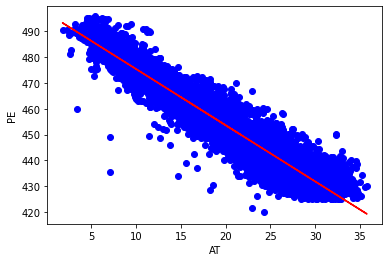

In [23]:
plt.scatter(train.AT, train.PE, color='blue') # Диаграмма рассеяния
plt.plot(train_x, regr.coef_[0][0]*train_x+regr.intercept_[0],'-r') # Линия регрессии на основе тренировочной выборки
plt.xlabel('AT')
plt.ylabel('PE')

In [24]:
from sklearn.metrics import r2_score

test_x=np.asanyarray(test[['AT']]) 
test_y=np.asanyarray(test[['PE']])
test_y_=regr.predict(test_x) # Расчет прогноза на основе тестовой выборки

print('Mean absolute error: %.2f' %np.mean(np.absolute(test_y_-test_y)))
print('Residual sum of squares (MSE): %.2f' %np.mean(np.absolute(test_y_-test_y)**2))
print('R2-score: %.2f' % r2_score(test_y_,test_y))

Mean absolute error: 4.27
Residual sum of squares (MSE): 29.86
R2-score: 0.89


## Модель 4

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [26]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [27]:
y_pred=ml.predict(x_test)
print(y_pred)

[431.40245096 458.61474119 462.81967423 ... 432.47380825 436.16417243
 439.00714594]


In [28]:
y_pred=ml.predict([[14.96,41.76,1024.07,73.17]])
print(y_pred)

[467.34820092]


In [29]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [2871, 1]

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

In [ ]:
pred_y_df=pd.DataFrame({'Actual Value':y_test,'Predicted value':y_pred,'Difference':y_test-y_pred})
pred_y_df[0:15]

## Множественная регрессия с другими данными

In [ ]:
df_1=pd.read_excel('Data/suicides_alcohol_unemployed.xlsx')
df_1

In [ ]:
model = smf.ols('Suicides ~ Alcohol * Unemployed', data=df_1)
model = model.fit()
model.summary()